In [36]:
# Classification Neural Network

In [37]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
# Importing prepared dataset
import pickle
input = open('data.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

In [39]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [40]:
# Initialising the ANN
cnn = Sequential()

# Adding the input layer and the first hidden layer
cnn.add(Dense(output_dim = 2, init = 'uniform', activation = 'relu', input_dim = 2))

# Adding the output layer
cnn.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\kater\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=2, units=2, kernel_initializer="uniform")`
  """
C:\Users\kater\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [43]:
# Fitting the ANN to the Training set
history = cnn.fit(X_train, y_train, batch_size = 8, nb_epoch = 100, validation_data=(X_test, y_test))

Train on 480 samples, validate on 120 samples
Epoch 1/100
328/480 [===================>..........] - ETA: 0s - loss: 0.3523 - accuracy: 0.8232

C:\Users\kater\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


480/480 [==============================] - 0s 360us/step - loss: 0.3079 - accuracy: 0.8583 - val_loss: 0.3026 - val_accuracy: 0.8750
Epoch 2/100
480/480 [==============================] - 0s 344us/step - loss: 0.3076 - accuracy: 0.8583 - val_loss: 0.3027 - val_accuracy: 0.8750
Epoch 3/100
480/480 [==============================] - 0s 549us/step - loss: 0.3076 - accuracy: 0.8583 - val_loss: 0.3020 - val_accuracy: 0.8750
Epoch 4/100
480/480 [==============================] - 0s 364us/step - loss: 0.3072 - accuracy: 0.8583 - val_loss: 0.3025 - val_accuracy: 0.8750
Epoch 5/100
480/480 [==============================] - 0s 425us/step - loss: 0.3071 - accuracy: 0.8583 - val_loss: 0.3026 - val_accuracy: 0.8750
Epoch 6/100
480/480 [==============================] - 0s 383us/step - loss: 0.3071 - accuracy: 0.8583 - val_loss: 0.3023 - val_accuracy: 0.8750
Epoch 7/100
480/480 [==============================] - 0s 439us/step - loss: 0.3070 - accuracy: 0.8583 - val_loss: 0.3026 - val_accuracy: 0.87

480/480 [==============================] - 0s 281us/step - loss: 0.3032 - accuracy: 0.8604 - val_loss: 0.2977 - val_accuracy: 0.8750
Epoch 58/100
480/480 [==============================] - 0s 279us/step - loss: 0.3031 - accuracy: 0.8583 - val_loss: 0.2983 - val_accuracy: 0.8750
Epoch 59/100
480/480 [==============================] - 0s 291us/step - loss: 0.3031 - accuracy: 0.8604 - val_loss: 0.2980 - val_accuracy: 0.8750
Epoch 60/100
480/480 [==============================] - 0s 279us/step - loss: 0.3032 - accuracy: 0.8625 - val_loss: 0.2984 - val_accuracy: 0.8750
Epoch 61/100
480/480 [==============================] - 0s 289us/step - loss: 0.3031 - accuracy: 0.8604 - val_loss: 0.2982 - val_accuracy: 0.8750
Epoch 62/100
480/480 [==============================] - 0s 286us/step - loss: 0.3031 - accuracy: 0.8604 - val_loss: 0.2976 - val_accuracy: 0.8750
Epoch 63/100
480/480 [==============================] - 0s 352us/step - loss: 0.3031 - accuracy: 0.8604 - val_loss: 0.2983 - val_accuracy

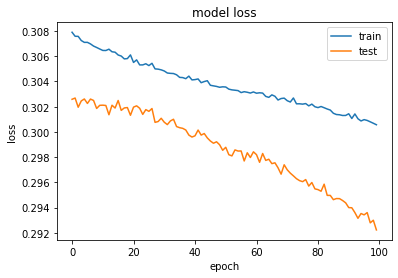

In [44]:
# Plotting loss & accuracy
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [45]:
# Predicting the Test set results
y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.5)

In [46]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[55 11]
 [ 4 50]]


In [ ]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, cnn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()